<a href="https://colab.research.google.com/github/Elahehpouryaghoub/Nanoparticles_Toxicity/blob/main/NP_Toxicity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.Loading Dataset

In [116]:
#uploading the dataset

from google.colab import files
uploaded = files.upload()

Saving Fixed_Encoded_Nanotoxicity_Dataset.csv to Fixed_Encoded_Nanotoxicity_Dataset (2).csv


In [225]:
import pandas as pd
nano = pd.read_csv("Fixed_Encoded_Nanotoxicity_Dataset.csv")
nano

,NPs,coresize,hydrosize,surfcharge,surfarea,Ec,Expotime,dosage,e,NOxygen,class
0,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,0.001,1.61,3,0
1,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,0.010,1.61,3,0
2,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,0.100,1.61,3,0
3,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,1.000,1.61,3,0
4,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,5.000,1.61,3,0
...,...,...,...,...,...,...,...,...,...,...,...
876,ZnO,45.3,310.0,32.7,21.3,-3.89,24,20.000,1.65,1,1
877,ZnO,32.0,1093.0,21.6,37.0,-3.89,24,25.000,1.65,1,1
878,ZnO,46.3,239.0,42.8,24.1,-5.17,12,100.000,1.90,1,1
879,ZnO,35.6,295.5,-41.6,27.9,-3.89,24,10.000,1.65,1,1


In [226]:
nano.shape

(881, 11)

In [227]:
nano["class"].value_counts()
#Toxic= 1 , nontoxic= 0

,count
class,
1,476
0,405


## 2.Preprocessing

In [228]:
# Applying One-Hot Encoding to the NPs column
nano = pd.get_dummies(nano, columns=['NPs'])
print(nano.head())

   coresize  hydrosize  surfcharge  surfarea    Ec  Expotime  dosage     e  \
0      39.7      267.0        36.3      64.7 -1.51        24   0.001  1.61   
1      39.7      267.0        36.3      64.7 -1.51        24   0.010  1.61   
2      39.7      267.0        36.3      64.7 -1.51        24   0.100  1.61   
3      39.7      267.0        36.3      64.7 -1.51        24   1.000  1.61   
4      39.7      267.0        36.3      64.7 -1.51        24   5.000  1.61   

   NOxygen  class  NPs_Al2O3  NPs_CuO  NPs_Fe2O3  NPs_TiO2  NPs_ZnO  
0        3      0       True    False      False     False    False  
1        3      0       True    False      False     False    False  
2        3      0       True    False      False     False    False  
3        3      0       True    False      False     False    False  
4        3      0       True    False      False     False    False  


In [229]:
# separating the target column from the rest
X = nano.drop(columns=['class'])  # Features (all except 'class')
y = nano['class']                 # Target variable (0 = nonToxic, 1 = Toxic)

In [230]:
# Normalizing numerical features (excluding the one-hot encoded columns)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [231]:
# Convert back to DataFrame
X_scaled = pd.DataFrame(X_scaled , columns= X.columns)
#x loses column names, making it harder to interpret the data.
# so we convert it back to dataframe

print(X_scaled.head())
print(y.head())


   coresize  hydrosize  surfcharge  surfarea   Ec  Expotime    dosage  \
0  0.274043   0.109101    0.922986  0.284236  1.0  0.304348  0.000003   
1  0.274043   0.109101    0.922986  0.284236  1.0  0.304348  0.000033   
2  0.274043   0.109101    0.922986  0.284236  1.0  0.304348  0.000333   
3  0.274043   0.109101    0.922986  0.284236  1.0  0.304348  0.003333   
4  0.274043   0.109101    0.922986  0.284236  1.0  0.304348  0.016667   

          e  NOxygen  NPs_Al2O3  NPs_CuO  NPs_Fe2O3  NPs_TiO2  NPs_ZnO  
0  0.194444      1.0        1.0      0.0        0.0       0.0      0.0  
1  0.194444      1.0        1.0      0.0        0.0       0.0      0.0  
2  0.194444      1.0        1.0      0.0        0.0       0.0      0.0  
3  0.194444      1.0        1.0      0.0        0.0       0.0      0.0  
4  0.194444      1.0        1.0      0.0        0.0       0.0      0.0  
0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64


In [232]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split ( X_scaled , y , test_size= 0.2 , random_state=42)

In [233]:
print( " Features => train :" , x_train.shape , " - test:" , x_test.shape)
print( "Label => train :" , y_train.shape , " - test:" , y_test.shape)

 Features => train : (704, 14)  - test: (177, 14)
Label => train : (704,)  - test: (177,)


## 3. Defining Evaluation Metrics

In [234]:
# making a function for accuracy, recall , precision , and F1
from sklearn.metrics import accuracy_score , recall_score , precision_score , f1_score

def calculating_metrics(y_test , y_train , y_pred_test , y_pred_train):

  acc_train = accuracy_score(y_true = y_train , y_pred= y_pred_train)
  acc_test = accuracy_score(y_true=y_test , y_pred= y_pred_test)

  recall = recall_score(y_true=y_test , y_pred= y_pred_test)
  precision=  precision_score(y_true= y_test , y_pred= y_pred_test)
  f1 = f1_score(y_true = y_test , y_pred = y_pred_test) #F1 balances Precision and Recall

  return {
        "Train Accuracy": acc_train,
        "Test Accuracy": acc_test,
        "Recall": recall,
        "Precision": precision,
        "F1-Score": f1
    }

## 4. Defining and Training Models

## XGBOOST

In [274]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective="binary:logistic",
    eval_metric="logloss",
    learning_rate=0.1,
    max_depth=5,
    n_estimators=100,
    use_label_encoder=False   )
xgb_model.fit(x_train , y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:35:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

## Logistic Regression

In [275]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=500 , class_weight='balanced' )
lr.fit(x_train , y_train)

LogisticRegression(class_weight='balanced', max_iter=500)

## Decision Tree

In [276]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 10 , min_samples_leaf = 12 , min_samples_split= 5 , criterion= "entropy")
dt.fit(x_train , y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=12,
                       min_samples_split=5)

## Random Forest

In [277]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300 , max_depth= 64 , min_samples_split=5 , )
rf.fit( x_train ,  y_train)

RandomForestClassifier(max_depth=64, min_samples_split=5, n_estimators=300)

## SVM

In [278]:
from sklearn.svm import SVC
svm = SVC(kernel="poly")
svm.fit(x_train , y_train)

SVC(kernel='poly')

## ANN

In [279]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(hidden_layer_sizes= (100 , 50) , activation= "relu" , max_iter= 500)
ann.fit(x_train , y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500)

## 5. Evaluating Models

In [280]:
import pandas as pd

# Dictionary of trained models
models = {
    "XGBOOST" : xgb_model ,
    "Decision Tree": dt,
    "Random Forest": rf,
    "SVM": svm,
    "Logistic Regression": lr,
    "ANN" : ann,
}

results = []  # To Store model results

# Loop through models and calculate metrics
for name, model in models.items():
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    metrics = calculating_metrics(y_test, y_train, y_pred_test, y_pred_train)
    metrics["Models"] =  name
    results.append(metrics)

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

   Train Accuracy  Test Accuracy    Recall  Precision  F1-Score  \
0        0.985795       0.960452  1.000000   0.930000  0.963731   
1        0.953125       0.932203  0.935484   0.935484  0.935484   
2        0.988636       0.954802  0.989247   0.929293  0.958333   
3        0.924716       0.881356  0.956989   0.839623  0.894472   
4        0.852273       0.807910  0.978495   0.739837  0.842593   
5        0.984375       0.966102  1.000000   0.939394  0.968750   

                Models  
0              XGBOOST  
1        Decision Tree  
2        Random Forest  
3                  SVM  
4  Logistic Regression  
5                  ANN  


## Visualizing Model Performance

## 7. Generating Heatmap

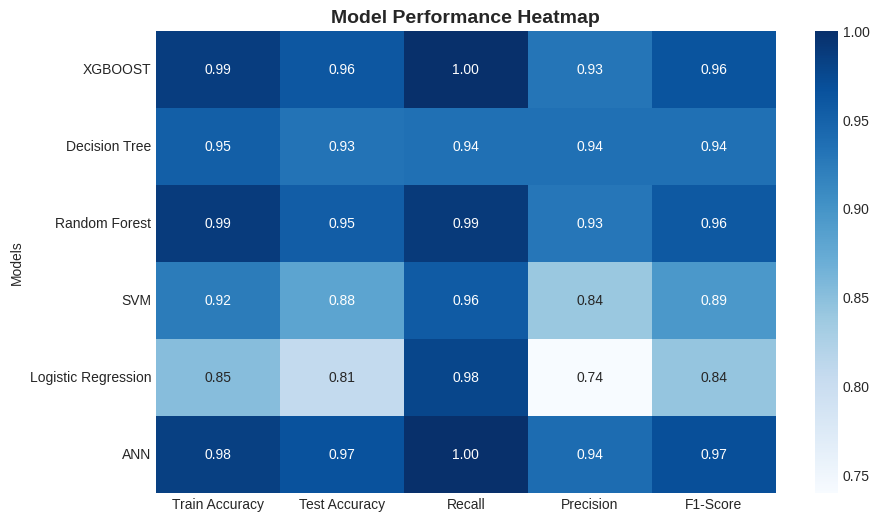

In [283]:
plt.figure(figsize=(10, 6))
sns.heatmap(results_df.set_index("Models"), annot=True, cmap="Blues", fmt=".2f")

plt.title("Model Performance Heatmap", fontsize=14, fontweight="bold")
plt.show()

## 8.Generating confusion metrices

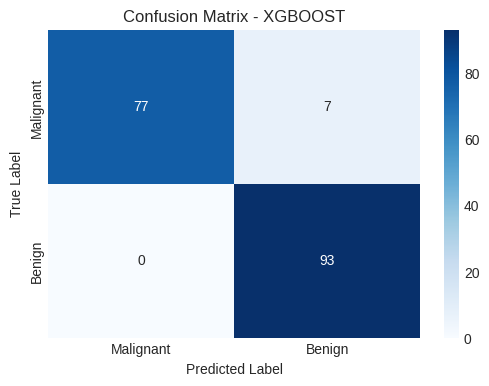

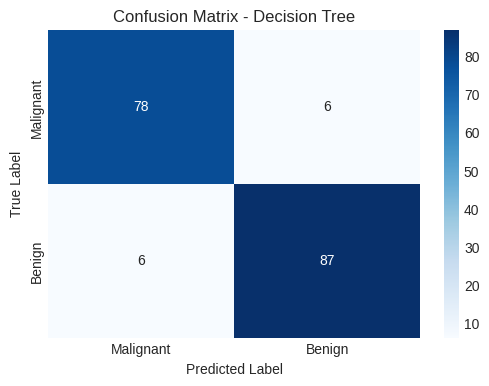

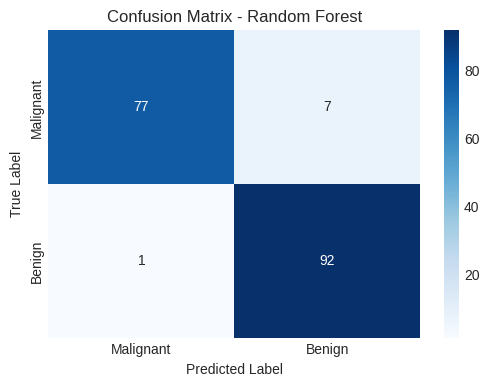

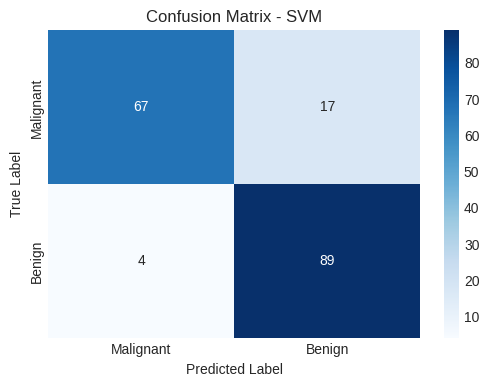

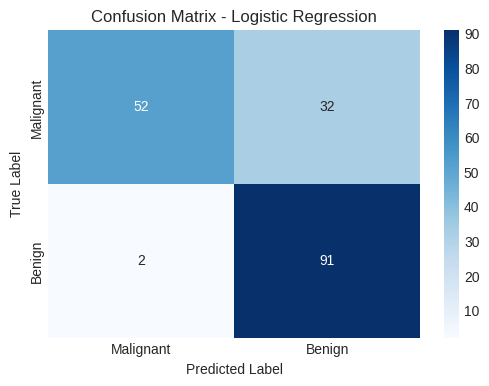

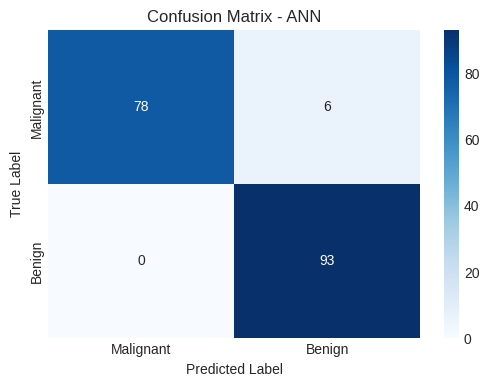

In [284]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(model_name, y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Generating confusion matrices for each model
for name, model in models.items():
    y_pred = model.predict(x_test)
    plot_confusion_matrix(name, y_test, y_pred)

## 9. Feature Importance Plot

Feature Importance tells you which features (variables) contribute the most to your model’s predictions.



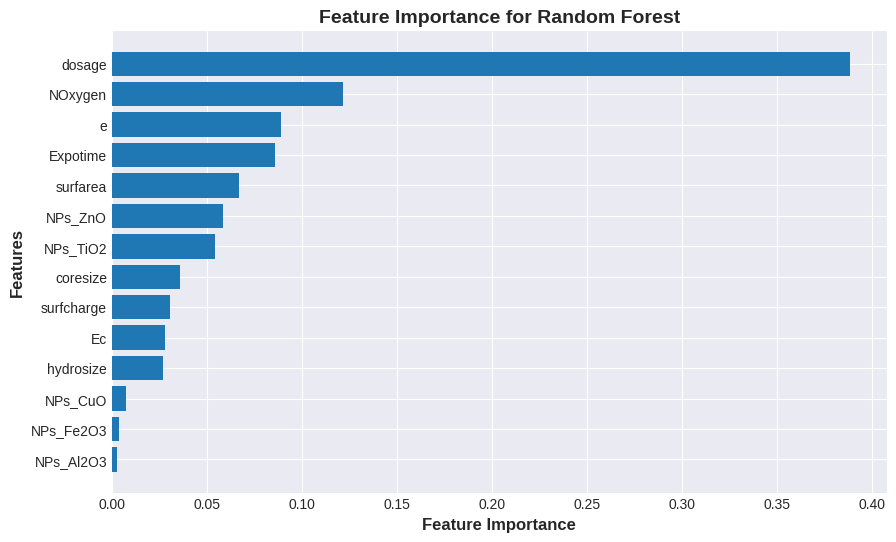

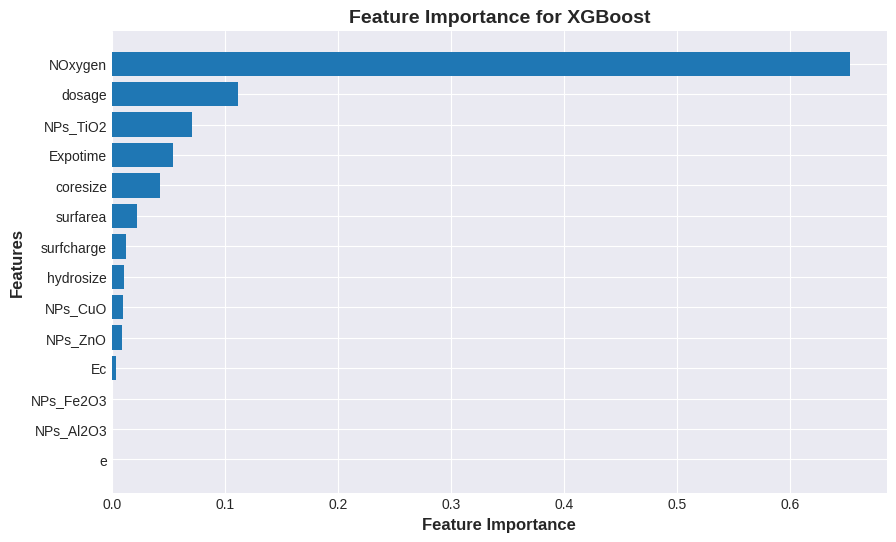

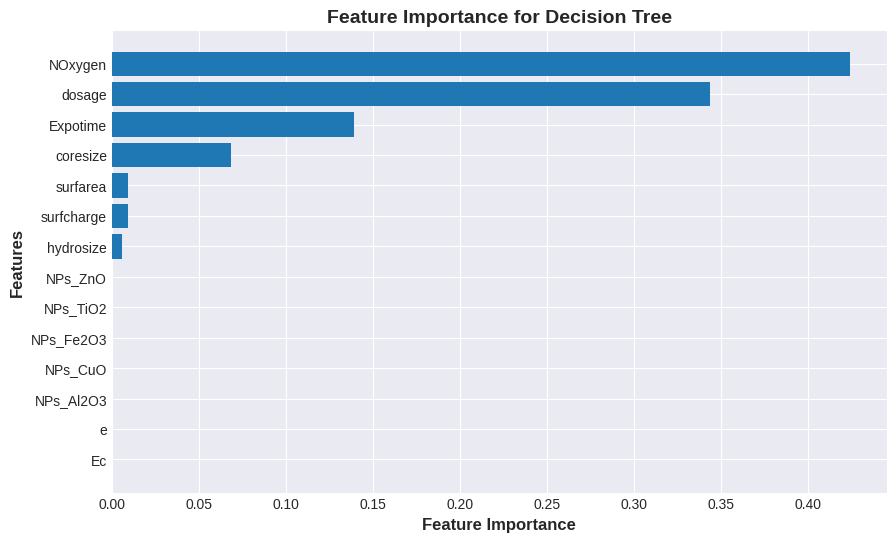

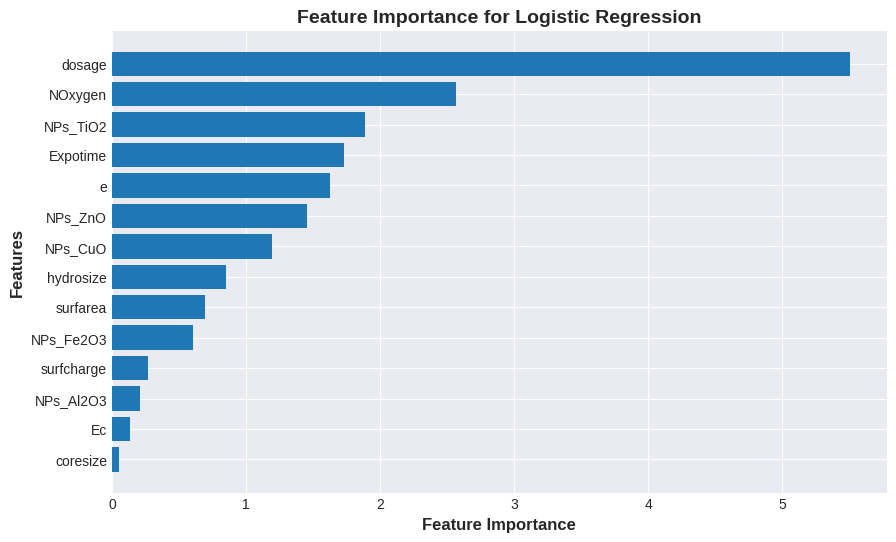

In [267]:

def plot_feature_importance(model, feature_names, model_name):
    # To check if the model has 'feature_importances_' (only works for tree-based models)
    if hasattr(model, "feature_importances_"):
        feature_importance = model.feature_importances_
    elif hasattr(model, "coef_"):  # For Logistic Regression & SVM
        feature_importance = np.abs(model.coef_).flatten()
    else:
        print(f" Feature importance not available for {model_name}")
        return  # Stop execution if model doesn't support feature importance

    sorted_idx = np.argsort(feature_importance)  # Sort features by importance

    plt.figure(figsize=(10,6))
    plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align="center")
    plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx])
    plt.xlabel("Feature Importance", fontsize=12, fontweight="bold")
    plt.ylabel("Features", fontsize=12, fontweight="bold")
    plt.title(f"Feature Importance for {model_name}", fontsize=14, fontweight="bold")
    plt.show()

plot_feature_importance(rf, X.columns, "Random Forest")
plot_feature_importance(xgb_model, X.columns, "XGBoost")
plot_feature_importance(dt, X.columns, "Decision Tree")
plot_feature_importance(lr, X.columns, "Logistic Regression")